Stock Market Prediction Project

Stock market prediction involves forecasting the future price of a stock based on historical data. This project uses Python, yfinance for data collection, and includes steps like data cleaning, preprocessing, transformation, and model building.

Importing Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
%matplotlib inline  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import save_model

Data Collection and Loading

In [79]:
# Define the stock symbol and date range
start = '2012-01-01'
end = '2022-12-21'
ticker = 'AAPL'
# Download stock data
df = yf.download(ticker, start, end, auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [80]:
# View the top rows
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2012-01-03,12.359184,14.686786,14.732143,14.607143,14.621429,302220800
2012-01-04,12.425602,14.765714,14.810000,14.617143,14.642857,260022000
2012-01-05,12.563550,14.929643,14.948214,14.738214,14.819643,271269600
2012-01-06,12.694888,15.085714,15.098214,14.972143,14.991786,318292800
2012-01-09,12.674751,15.061786,15.276786,15.048214,15.196429,394024400


Data Cleaning

In [81]:
# Check for missing values
df.isnull().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [82]:
# Drop rows with missing values
df.dropna(inplace=True)

In [83]:
# Reset index to ensure date is a column
df.reset_index(inplace=True)

In [84]:
# Check data types and structure
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           2761 non-null   datetime64[ns]
 1   (Adj Close, AAPL)  2761 non-null   float64       
 2   (Close, AAPL)      2761 non-null   float64       
 3   (High, AAPL)       2761 non-null   float64       
 4   (Low, AAPL)        2761 non-null   float64       
 5   (Open, AAPL)       2761 non-null   float64       
 6   (Volume, AAPL)     2761 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 151.1 KB


(2761, 7)

Data Preprocessing

In [85]:
# Select relevant features
data = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].copy()

In [86]:
# Set 'Date' as index
data.set_index('Date', inplace=True)

In [87]:
# Normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [88]:
# Convert to dataframe
scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)
scaled_df = scaled_df.reset_index()
scaled_df.set_index('Date', inplace=True)
scaled_df

Price,Open,High,Low,Close,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,0.004535,0.002731,0.005162,0.004399,0.181535
2012-01-04,0.004662,0.003193,0.005222,0.004869,0.152847
2012-01-05,0.005709,0.004013,0.005954,0.005844,0.160493
2012-01-06,0.006729,0.004902,0.007369,0.006773,0.192462
2012-01-09,0.007942,0.005961,0.007829,0.006630,0.243948
...,...,...,...,...,...
2022-12-14,0.779113,0.784904,0.770449,0.769134,0.032017
2022-12-15,0.753990,0.756090,0.739427,0.729208,0.043331


In [89]:
# Define the target variable (closing price) and features
X = scaled_df.drop('Close', axis=1)
y = scaled_df['Close']

C:\Users\DELL\AppData\Local\Temp\ipykernel_14320\2696432261.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = scaled_df.drop('Close', axis=1)


In [90]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2208 entries, 2012-01-03 to 2020-10-09
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Open, AAPL)    2208 non-null   float64
 1   (High, AAPL)    2208 non-null   float64
 2   (Low, AAPL)     2208 non-null   float64
 3   (Volume, AAPL)  2208 non-null   float64
dtypes: float64(4)
memory usage: 86.2 KB


In [92]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 553 entries, 2020-10-12 to 2022-12-20
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Open, AAPL)    553 non-null    float64
 1   (High, AAPL)    553 non-null    float64
 2   (Low, AAPL)     553 non-null    float64
 3   (Volume, AAPL)  553 non-null    float64
dtypes: float64(4)
memory usage: 21.6 KB


Exploratory Data Analysis(EDA)

Understand the stock's historical behavior, trends, and relationships.

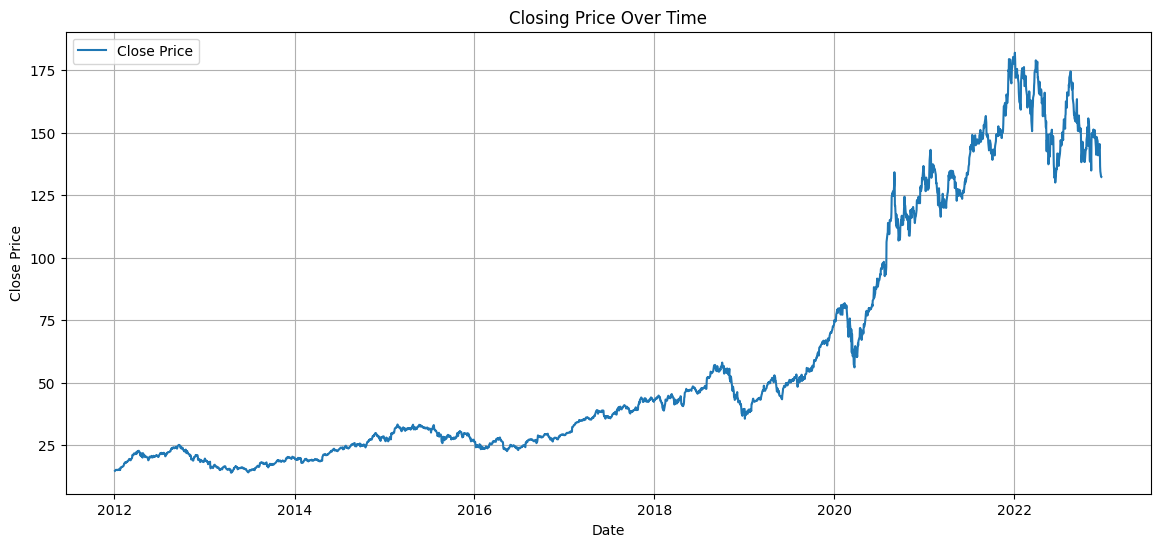

In [93]:
# Plot closing price over time
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

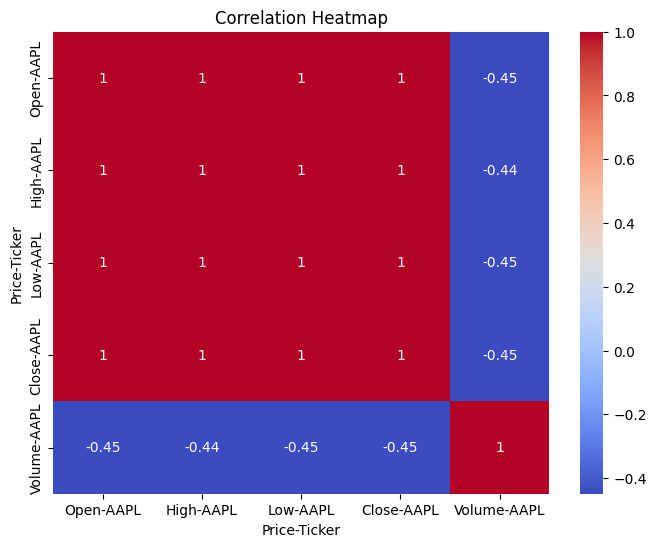

In [94]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

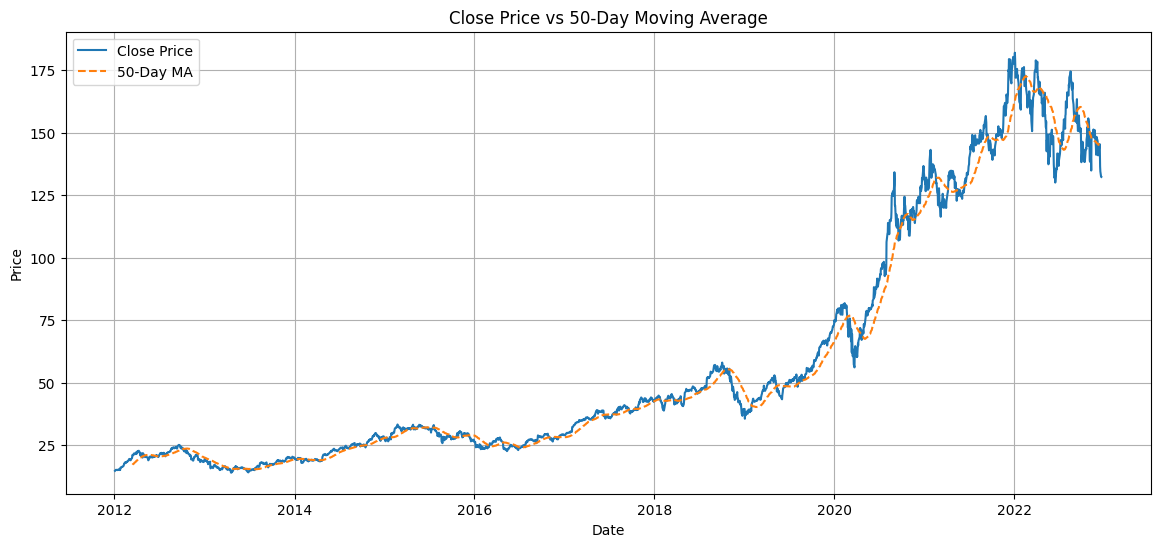

In [95]:
# Moving Average (50 days)
df['MA50'] = df['Close'].rolling(window=50).mean()
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA50'], label='50-Day MA', linestyle='--')
plt.title('Close Price vs 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

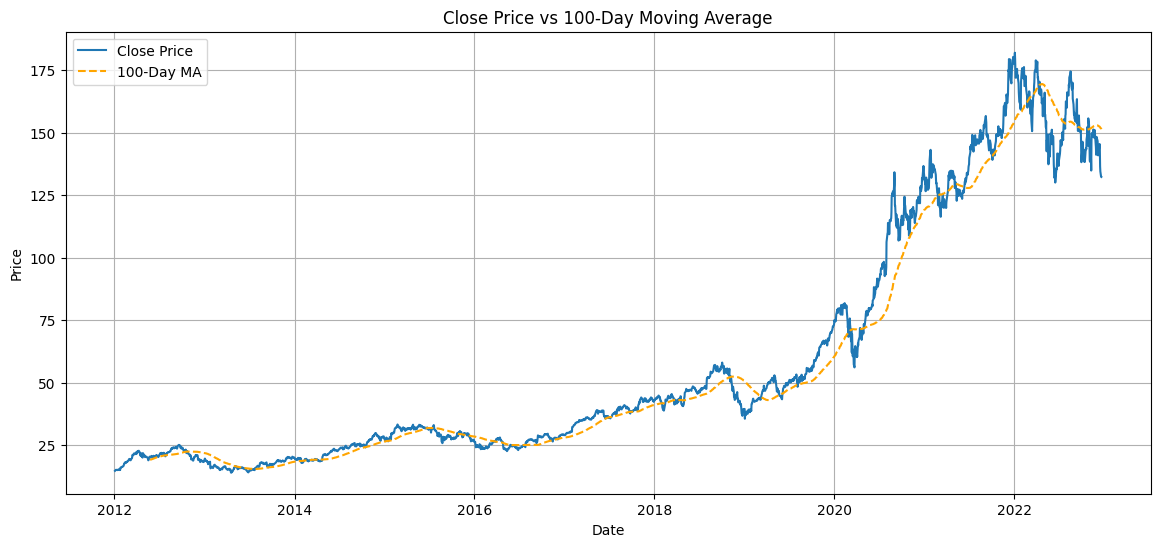

In [96]:
# Plot closing price and 100-day MA
df['MA100'] = df['Close'].rolling(window=100).mean()
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA100'], label='100-Day MA', color='orange', linestyle='--')
plt.title('Close Price vs 100-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

Model Building Using LSTM

To use a Long Short-Term Memory (LSTM) neural network to predict the closing price of a stock based on its historical data. LSTMs are effective for time series forecasting due to their ability to learn from sequential patterns.

In [97]:
# 1. Prepare Sequential Input for LSTM
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

In [98]:
# 2. Build the LSTM Model
# Initialize the model
model = Sequential()

# First LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Dense layers for prediction
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [99]:
# 3. Train the Model with validation
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_seq, y_test_seq),
    verbose=1
)

Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.0063 - val_loss: 0.0021
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.9582e-04 - val_loss: 0.0044
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.3201e-04 - val_loss: 0.0012
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.7552e-04 - val_loss: 0.0016
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.8107e-04 - val_loss: 0.0015
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.2285e-04 - val_loss: 0.0010
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.8098e-04 - val_loss: 0.0026
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.9672e-04 - val_loss: 0.0010
Epoch 9/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.9939e-04 - val_loss: 0.0022
Epoch 10/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.8447e-04 - val_loss: 0.0018
Epoch 11/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.6852e-04 - val_loss: 9.9599e-04
Epoch 12/20
69/69 ━

In [100]:
# 4. Display model architecture
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 10, 50)         │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,505 (380.88 KB)

 Trainable params: 32,501 (126.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 65,004 (253.93 KB)

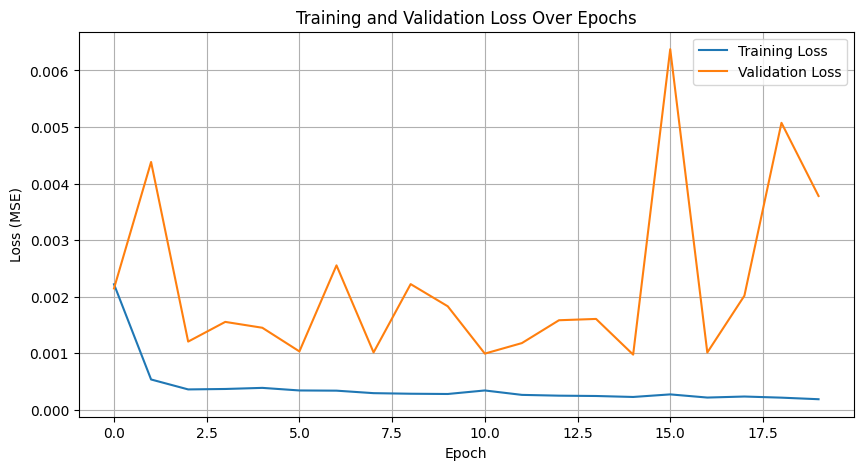

In [101]:
# 5. Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

In [102]:
# Predict the closing price using test data
predictions = model.predict(X_test_seq)
y_test_actual = y_test_seq.reshape(-1, 1)
predicted_price = scaler.inverse_transform(np.concatenate((X_test_seq[:, -1, :], predictions), axis=1))[:, -1]
actual_price = scaler.inverse_transform(np.concatenate((X_test_seq[:, -1, :], y_test_actual), axis=1))[:, -1]

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


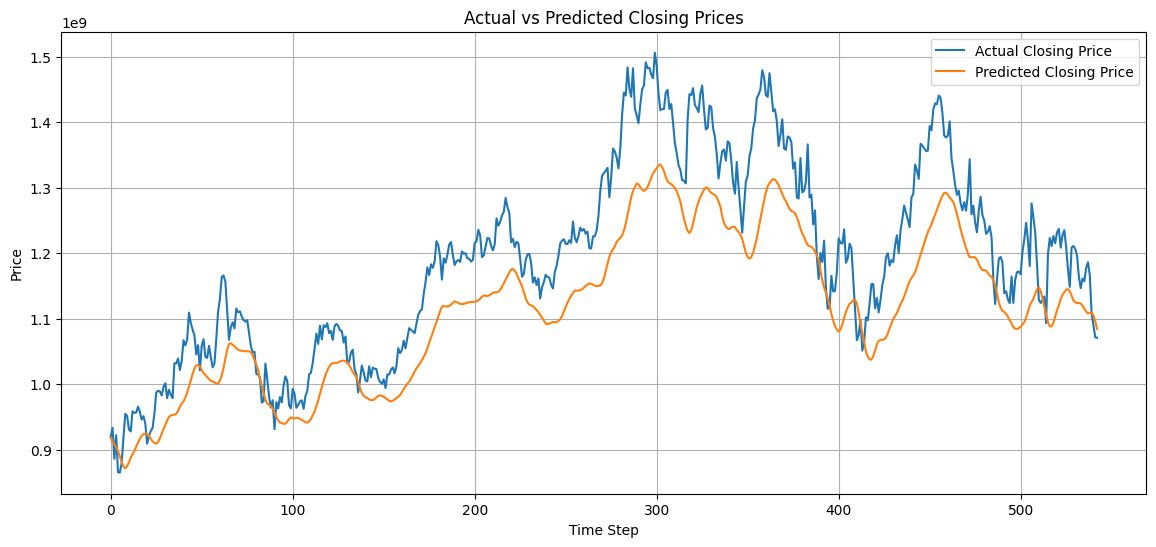

In [103]:
# 6. Plot Predicted vs Actual Closing Prices
plt.figure(figsize=(14, 6))
plt.plot(actual_price, label='Actual Closing Price')
plt.plot(predicted_price, label='Predicted Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [104]:
# Save the model in new Keras format
model.save('lstm_stock_model.keras')

In [105]:
import joblib
joblib.dump(scaler, 'scaler.save')

['scaler.save']